
# 🧠 Machine Learning Lesson: Linear Regression (Simple & Multiple)

---

## 🎯 Learning Objectives
Topics to discuss:
- Understand what Linear Regression is and why it’s called “linear.”
- Learn the difference between simple and multiple linear regression.
- Implement both models using Python & Scikit-learn.
- Evaluate models using R², MAE, MSE, and RMSE.
- Learn how to save and load trained models.
- Compare Linear, Ridge, and Lasso regressions.



## 📘 1. Introduction: What is Linear Regression?

Linear Regression is one of the simplest and most powerful algorithms in machine learning.

It helps us understand **the relationship between input (X)** and **output (y)** by fitting a straight line through data points.

For example:
> Predicting a student’s score based on how many hours they studied.

If you plot “Hours studied” vs “Score,” the data might look like this:

- As hours increase, scores tend to increase too.  
- The goal is to find the **best-fitting line** through these points.



## 💡 2. Why is it called *Linear* Regression?

The word **“linear”** refers to the **linear relationship** between the input variables (features) and the output (target).  
Even if the data looks curved or complex, the model assumes the relationship can be represented as a straight line (or plane in higher dimensions).

The term **“regression”** comes from Francis Galton’s 19th-century study on how children’s heights “regressed” toward their parents’ average — hence, “regression to the mean.”


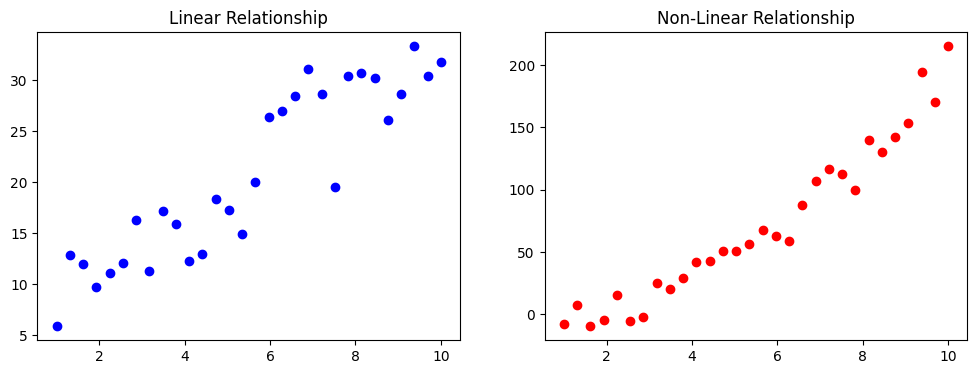

In [1]:

# 📊 Let's visualize linear vs. non-linear relationships
import numpy as np
import matplotlib.pyplot as plt

# Linear data
x_linear = np.linspace(1, 10, 30)
y_linear = 3 * x_linear + 5 + np.random.randn(30) * 3

# Non-linear data
x_nonlinear = np.linspace(1, 10, 30)
y_nonlinear = 2 * (x_nonlinear ** 2) + np.random.randn(30) * 10

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(x_linear, y_linear, color='blue')
axes[0].set_title("Linear Relationship")
axes[1].scatter(x_nonlinear, y_nonlinear, color='red')
axes[1].set_title("Non-Linear Relationship")
plt.show()



# 🧠 Deep Dive: Understanding Linear Regression (Simple & Multiple)

## 🔹 Simple Linear Regression

Simple Linear Regression has **one independent variable (X)** and **one dependent variable (y)**.

The formula is:
\[ y = m x + b \]

Where:
- **y** → dependent variable (target)  
- **x** → independent variable (input)  
- **m** → slope (coefficient)  
- **b** → intercept (predicted value when x=0)

**Slope (m)**: Change in y per unit change in x  
**Intercept (b)**: Baseline prediction when x=0

## 🔸 Multiple Linear Regression

Multiple features:

\[ y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n \]

Each coefficient represents **effect of that feature while keeping others constant**.

## ⚙️ Model Evaluation

Metrics:
- **MAE** = average absolute error  
- **MSE** = average squared error (penalizes large errors)  
- **RMSE** = sqrt(MSE), interpretable in original units  
- **R²** = proportion of variance explained (1 = perfect, 0 = none)

![MSE](./MeanSquaredError.png)

![Loss Function](LossFunction.png)

![R Square](./R_Square.png)

![R Squared Formula](./R_Squared_Formula.png)


## 🧩 3. Simple Linear Regression (Student Scores Dataset)

In [ ]:
#Simple Linear Regression — load dataset and EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


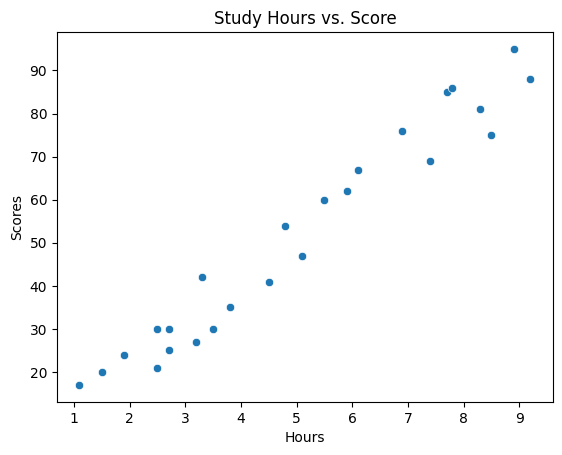

In [3]:

# Explore
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title("Study Hours vs. Score")
plt.show()


In [8]:
#Train/test split and model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['Hours']]
y = data['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")


Intercept: 2.826892353899737, Coefficient: 9.682078154455697


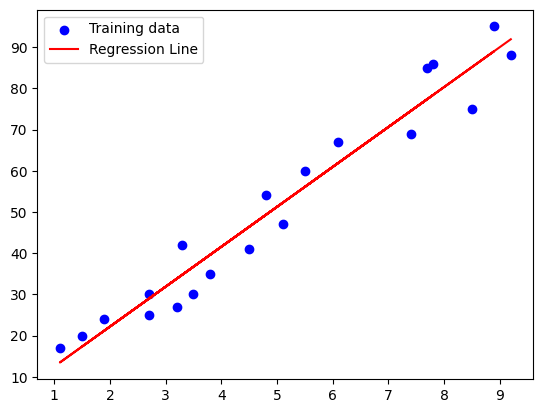

In [9]:

# Regression Line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.legend()
plt.show()


In [10]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}")


R²: 0.968, MAE: 3.921, MSE: 18.943, RMSE: 4.352


In [11]:

import joblib

# Save model
joblib.dump(model, 'simple_linear_regression_model.pkl')
loaded_model = joblib.load('simple_linear_regression_model.pkl')
print("Model reloaded successfully!")


Model reloaded successfully!


## 🧩 4. Multiple Linear Regression (House Prices Dataset)

In [12]:

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
df = df.dropna()
X = df[['median_income', 'housing_median_age', 'total_rooms']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)

r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
print(f"R²: {r2_multi:.3f}, RMSE: {rmse_multi:.3f}")


Coefficients: [4.24400807e+04 1.95931467e+03 3.82479442e+00]
Intercept: -23739.133323143848
R²: 0.514, RMSE: 81545.519


### 📊 Multiple Regression Visualizations

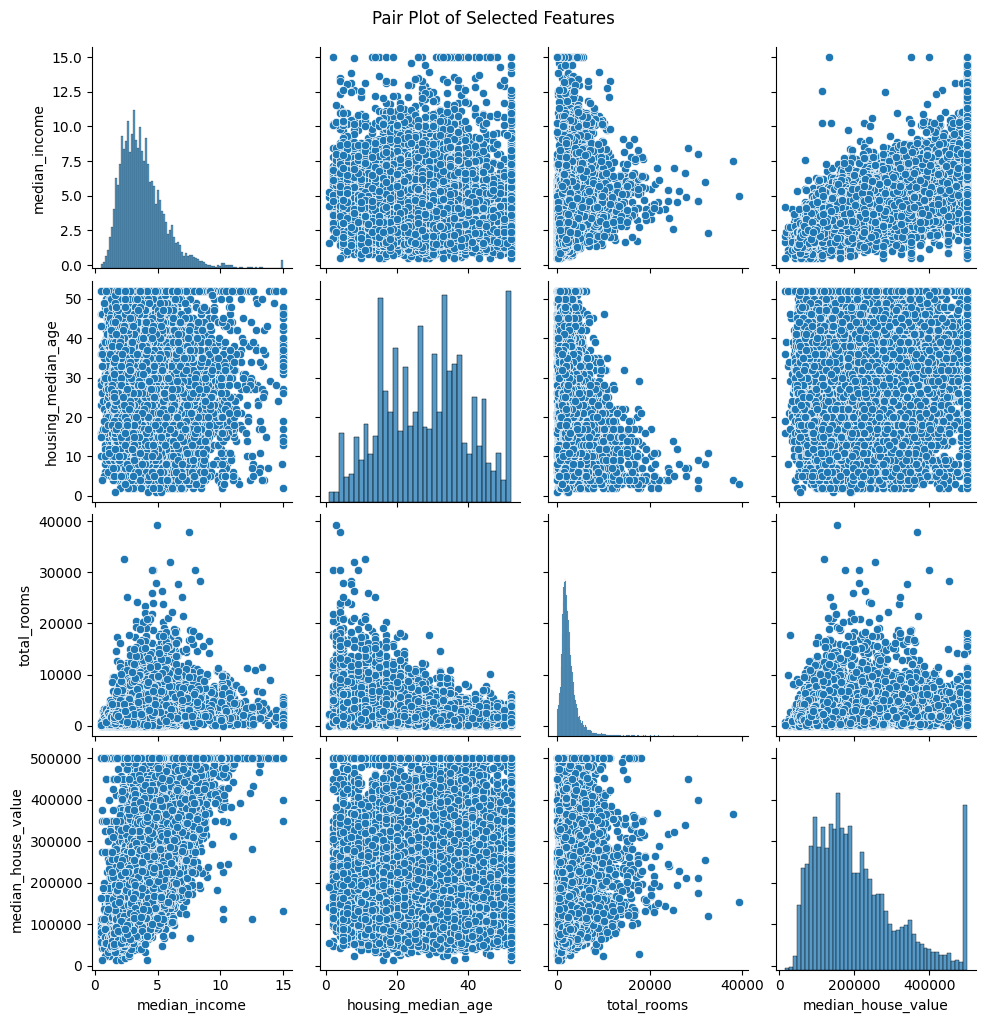

In [13]:

# Pairplot
sns.pairplot(df[['median_income', 'housing_median_age', 'total_rooms', 'median_house_value']])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


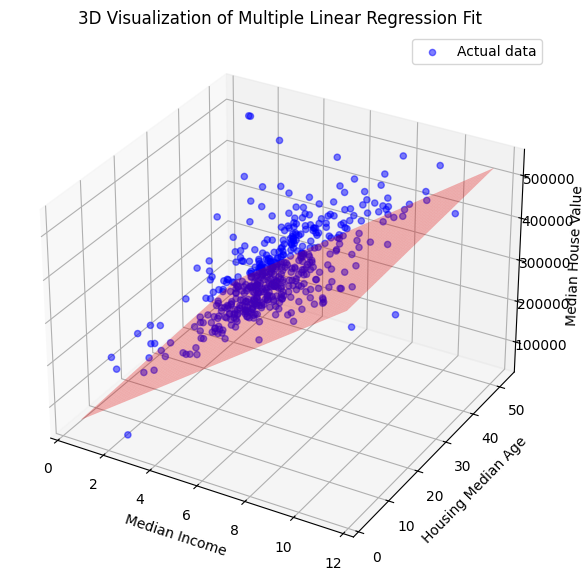

In [14]:

from mpl_toolkits.mplot3d import Axes3D
X_3d = df[['median_income', 'housing_median_age']][:500]
y_3d = df['median_house_value'][:500]

model_3d = LinearRegression()
model_3d.fit(X_3d, y_3d)

x_surf, y_surf = np.meshgrid(
    np.linspace(X_3d['median_income'].min(), X_3d['median_income'].max(), 50),
    np.linspace(X_3d['housing_median_age'].min(), X_3d['housing_median_age'].max(), 50)
)
onlyX = pd.DataFrame({
    'median_income': x_surf.ravel(),
    'housing_median_age': y_surf.ravel()
})
fittedY = model_3d.predict(onlyX).reshape(x_surf.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d['median_income'], X_3d['housing_median_age'], y_3d, color='blue', alpha=0.5, label='Actual data')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Median Income')
ax.set_ylabel('Housing Median Age')
ax.set_zlabel('Median House Value')
ax.set_title('3D Visualization of Multiple Linear Regression Fit')
plt.legend()
plt.show()


### ⚖️ Comparing Linear, Ridge, and Lasso Regression

In [15]:

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = {"Linear": multi_model, "Ridge": ridge, "Lasso": lasso}
results = {}
for name, m in models.items():
    y_pred = m.predict(X_test)
    results[name] = {"R²": r2_score(y_test, y_pred), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))}

import pandas as pd
pd.DataFrame(results).T


,R²,RMSE
Linear,0.513742,81545.519160
Ridge,0.513741,81545.530887
Lasso,0.513742,81545.519697


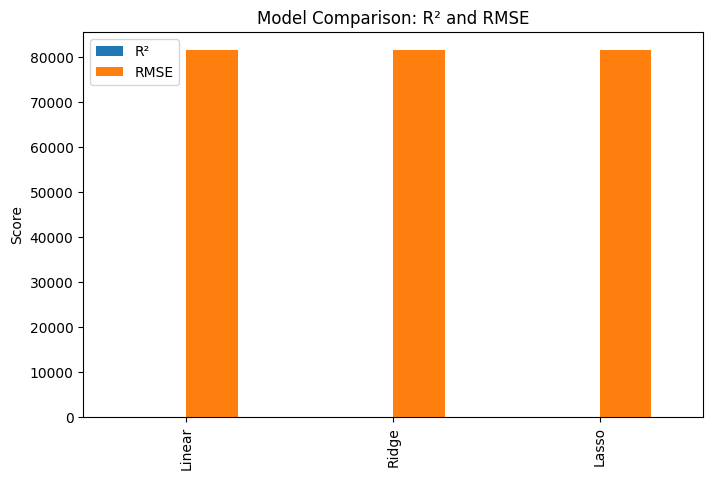

In [16]:

# Visualization of model comparison
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(8,5))
plt.title("Model Comparison: R² and RMSE")
plt.ylabel("Score")
plt.show()
